In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sb

# Read Data

In [2]:
A = pd.read_csv("C:/Users/AYUSH/Desktop/Dataset/Cars93.csv")

In [3]:
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


# Profile

In [4]:
A.shape

(93, 28)

In [5]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [6]:
A.describe()

,id,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,82.000000,93.000000
mean,47.000000,17.125806,19.509677,21.898925,22.365591,29.086022,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.829670,13.890244,3072.903226
std,26.990739,8.746029,9.659430,11.030457,5.619812,5.331726,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.989072,2.997967,589.896510
min,1.000000,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,24.000000,10.800000,12.200000,14.700000,18.000000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,47.000000,14.700000,17.700000,19.600000,21.000000,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,70.000000,20.300000,23.300000,25.300000,25.000000,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,93.000000,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


# Replace Null values

In [7]:
def Replacer(df):
    Q = pd.DataFrame(df.isna().sum(),columns=["Count_nan"])
    for i in Q[Q.Count_nan>0].index:
        if(df[i].dtypes=='object'):
            x = df[i].mode()[0]
            df[i] = df[i].fillna(x)
        else:
            y = round(df[i].mean(),3)
            df[i] = df[i].fillna(y)

In [8]:
Replacer(A)

# K-means Clustering

In [9]:
B = A[["Price","MPG.city"]]

In [10]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
model=km.fit(B)

In [11]:
model.labels_

array([0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0])

In [12]:
B['Clusters']=model.labels_

In [13]:
B.head()

,Price,MPG.city,Clusters
0,15.9,25,0
1,33.9,18,2
2,29.1,20,2
3,37.7,19,2
4,30.0,22,2


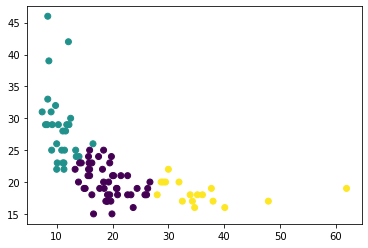

In [14]:
plt.scatter(B['Price'],B['MPG.city'],c=B.Clusters)

# Elbow Curve

In [15]:
from sklearn.cluster import KMeans
K = list(range(1,15,1))
WCSS = []
for i in range(1,15,1):
    km = KMeans(n_clusters=i)
    model = km.fit(B)
    WCSS.append(model.inertia_)

In [16]:
K

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [17]:
WCSS

[11543.91376344086,
 5336.652826086956,
 3074.662666263864,
 2186.1202597402594,
 1482.1028318038564,
 1076.3918948626047,
 841.7820484330482,
 685.7739564203912,
 554.6299564203912,
 476.1608846153846,
 408.19586080586083,
 357.5617338217338,
 330.58079695304696,
 287.2931028693529]

In [18]:
list(zip(K,WCSS))

[(1, 11543.91376344086),
 (2, 5336.652826086956),
 (3, 3074.662666263864),
 (4, 2186.1202597402594),
 (5, 1482.1028318038564),
 (6, 1076.3918948626047),
 (7, 841.7820484330482),
 (8, 685.7739564203912),
 (9, 554.6299564203912),
 (10, 476.1608846153846),
 (11, 408.19586080586083),
 (12, 357.5617338217338),
 (13, 330.58079695304696),
 (14, 287.2931028693529)]

([<matplotlib.axis.XTick at 0x22791808910>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

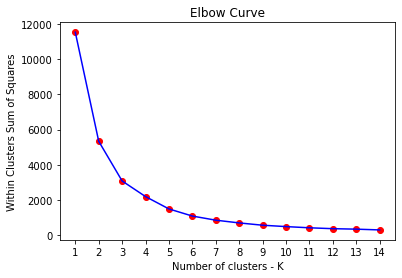

In [19]:
import matplotlib.pyplot as plt
plt.scatter(K,WCSS,c="red")
plt.plot(K,WCSS,c="blue")
plt.xlabel("Number of clusters - K")
plt.ylabel("Within Clusters Sum of Squares")
plt.title("Elbow Curve")
plt.xticks(range(1,15,1))

 K=5

In [20]:
B1 = A[["Price","MPG.city"]]

In [21]:
KM = KMeans(n_clusters=5)
model = KM.fit(B1)

In [22]:
model.labels_

array([4, 1, 1, 1, 1, 4, 0, 0, 0, 1, 1, 4, 4, 4, 4, 0, 0, 0, 1, 0, 4, 1,
       3, 4, 4, 0, 4, 0, 3, 0, 3, 4, 4, 4, 4, 0, 0, 0, 3, 3, 0, 3, 4, 3,
       4, 4, 4, 2, 1, 1, 1, 1, 3, 3, 4, 0, 1, 1, 2, 4, 4, 3, 0, 3, 4, 0,
       0, 4, 4, 0, 0, 4, 3, 4, 0, 0, 0, 1, 3, 3, 4, 0, 3, 3, 4, 0, 0, 4,
       0, 0, 0, 0, 0])

In [23]:
B1['Clusters']=model.labels_

In [24]:
B1.head()

,Price,MPG.city,Clusters
0,15.9,25,4
1,33.9,18,1
2,29.1,20,1
3,37.7,19,1
4,30.0,22,1


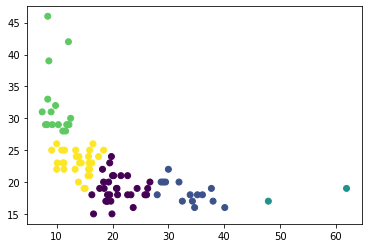

In [25]:
plt.scatter(B1['Price'],B1['MPG.city'],c=B1.Clusters)

In [26]:
B1["Make"]=A.Make

In [27]:
B1.head()

,Price,MPG.city,Clusters,Make
0,15.9,25,4,Acura Integra
1,33.9,18,1,Acura Legend
2,29.1,20,1,Audi 90
3,37.7,19,1,Audi 100
4,30.0,22,1,BMW 535i


In [28]:
a = input("Enter the car ")
cluster_no_of_car = B1[B1.Make==a].Clusters.values[0]

print("Cars that are similar to your cars are: ")

print(B1[B1.Clusters==cluster_no_of_car].Make.values)

Enter the car Acura Legend
Cars that are similar to your cars are: 
['Acura Legend' 'Audi 90' 'Audi 100' 'BMW 535i' 'Cadillac DeVille'
 'Cadillac Seville' 'Chevrolet Corvette' 'Chrysler Imperial' 'Lexus ES300'
 'Lexus SC300' 'Lincoln Continental' 'Lincoln Town_Car' 'Mazda RX-7'
 'Mercedes-Benz 190E' 'Saab 900']


In [30]:
B1.head()

,Price,MPG.city,Clusters,Make
0,15.9,25,4,Acura Integra
1,33.9,18,1,Acura Legend
2,29.1,20,1,Audi 90
3,37.7,19,1,Audi 100
4,30.0,22,1,BMW 535i


# Hiearchical Clustering

In [31]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=4)
B = A[["MPG.city","Price","Length"]]
model = agc.fit(B)

In [32]:
model.labels_

array([0, 2, 1, 2, 1, 3, 3, 2, 3, 2, 2, 1, 1, 3, 3, 1, 3, 2, 1, 3, 1, 3,
       0, 0, 1, 1, 3, 1, 0, 3, 0, 0, 0, 1, 0, 1, 3, 2, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 2, 1, 2, 2, 2, 0, 0, 1, 3, 1, 1, 2, 0, 3, 0, 1, 0, 1, 3,
       3, 3, 3, 3, 3, 0, 0, 1, 3, 3, 1, 1, 0, 0, 0, 1, 0, 0, 1, 3, 3, 0,
       3, 1, 0, 3, 1], dtype=int64)

In [33]:
B["Cluster"]= model.labels_

In [34]:
B.head(2)

,MPG.city,Price,Length,Cluster
0,25,15.9,177,0
1,18,33.9,195,2


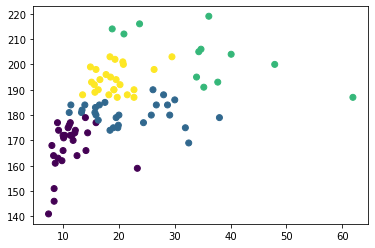

In [35]:
plt.scatter(B['Price'],B['Length'],c=B.Cluster)

# Creation Of a Dendogram

In [36]:
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage

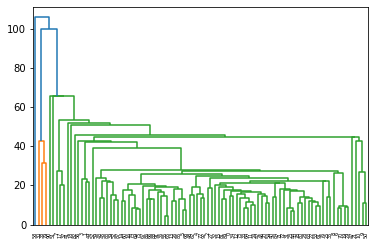

In [37]:
D = pd.DataFrame(distance_matrix(B.values,B.values))
dendrogram(linkage(D))
plt.show()

In [38]:
B["Model"] = A["Model"]

In [39]:
B.head()

,MPG.city,Price,Length,Cluster,Model
0,25,15.9,177,0,Integra
1,18,33.9,195,2,Legend
2,20,29.1,180,1,90
3,19,37.7,193,2,100
4,22,30.0,186,1,535i


In [41]:
model = input("Enter the car ")
cluster_no_of_car = B[B.Model==model].Cluster.values[0]

print("Cars that are similar to your cars are: ")

print(B[B.Cluster==cluster_no_of_car].Model.values)

Enter the car Integra
Cars that are similar to your cars are: 
['Integra' 'Colt' 'Shadow' 'Summit' 'Festiva' 'Escort' 'Tempo' 'Probe'
 'Metro' 'Storm' 'Civic' 'Excel' 'Elantra' 'Scoupe' '323' 'Protege'
 'Capri' 'Mirage' 'Sentra' 'Laser' 'LeMans' 'SL' 'Justy' 'Loyale' 'Swift'
 'Tercel' 'Fox' 'Corrado']
